In [70]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
plt.style.use('default')
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['font.size']=15
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['ytick.major.size'] = 7

yor__cmap = mpl.cm.get_cmap('YlOrRd');
greys__cmap = mpl.cm.get_cmap('Greys');


In [72]:
def getGalaxyData(snapshot):
    return np.genfromtxt('./Data/GalaxyData/GalaxyData_Snap.'+str(snapshot)+'.txt')
def getWebData(snapshot):
    return np.genfromtxt('./Data/WebData/galaxy_web_data.'+str(snapshot)+'.txt')

snap:  135  with bin from  0.0  to  0.2  has N entries:  80
snap:  135  with bin from  0.2  to  0.4  has N entries:  188
snap:  135  with bin from  0.4  to  0.6  has N entries:  159
snap:  135  with bin from  0.0  to  0.2  has N entries:  174
snap:  135  with bin from  0.2  to  0.4  has N entries:  528
snap:  135  with bin from  0.4  to  0.6  has N entries:  585
snap:  135  with bin from  0.6  to  0.8  has N entries:  82


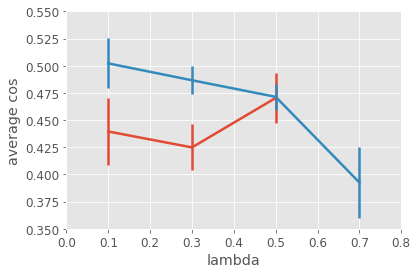

In [73]:
def plotCos(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1):
    galData=getGalaxyData(snapshot)
    webData=getWebData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5) & (webData[:,17]==0)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.median(np.abs(webData[inBin,15]))
        err[i]=np.std(np.abs(webData[inBin,15]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err)

cosLambda=plt.gca()
plotCos(cosLambda,135,3,0,0.6,massCut=5)
plotCos(cosLambda,135,4,0,0.8,massCut=5,plusMinus=-1)
#plotCos(cosLambda,116,2,0.1,0.5,massCut=5)
#plotCos(cosLambda,103,3,0,0.6,massCut=5,plusMinus=-1)
cosLambda.set_xlim(0,0.8)
cosLambda.set_ylim(0.35,0.55)
cosLambda.set_xlabel('lambda')
cosLambda.set_ylabel('average cos')
plt.show()

In [74]:
def plotAgn(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1,colour='k'):
    galData=getGalaxyData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.mean(np.abs(galData[inBin,19]))
        err[i]=np.std(np.abs(galData[inBin,19]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err,c=colour)
    print(average)
def plotSfr(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1,colour='k'):
    galData=getGalaxyData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.mean(np.abs(galData[inBin,20]))
        err[i]=np.std(np.abs(galData[inBin,20]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err,c=colour)
    print(average)
fig = plt.figure(figsize=(5,8))
mDotPlot = plt.gca()
agnCmap=mpl.cm.get_cmap('OrRd')
sfrCmap=mpl.cm.get_cmap('PuBu')
plotAgn(mDotPlot,135,4,0,0.6,massCut=5,colour=agnCmap(0.95))
plotAgn(mDotPlot,116,3,0,0.6,massCut=5,colour=agnCmap(0.8))
plotAgn(mDotPlot,105,3,0,0.7,massCut=5,colour=agnCmap(0.65))
plotAgn(mDotPlot,85,3,0,0.7,massCut=5,colour=agnCmap(0.5))
mDotPlot.text(0.5,10**-2.5,r'$\dot{M}_{BH}$',fontsize=20,color=agnCmap(0.8))
plotSfr(mDotPlot,135,4,0,0.6,massCut=5,colour=sfrCmap(0.95))
plotSfr(mDotPlot,116,3,0,0.6,massCut=5,colour=sfrCmap(0.8))
plotSfr(mDotPlot,105,3,0,0.7,massCut=5,colour=sfrCmap(0.65))
plotSfr(mDotPlot,85,3,0,0.7,massCut=5,colour=sfrCmap(0.5))
mDotPlot.text(0.5,10**-1,r'$\dot{M}_{SF}$',fontsize=20,color=sfrCmap(0.8))
mDotPlot.set_xlim(0,0.65)
mDotPlot.set_ylim(10**-3.5,10**0.5)
mDotPlot.set_xlabel(r'$\lambda_R$')
mDotPlot.set_ylabel(r'$\dot{M}\ \ (10^{10} M_\odot Gyr^{-1})$')
mDotPlot.set_yscale('log')
mDotPlot.set_facecolor('white')
plt.tight_layout()
plt.savefig('Plots/FeedbackZ0.pdf')

snap:  135  with bin from  0.0  to  0.15  has N entries:  167
snap:  135  with bin from  0.15  to  0.3  has N entries:  213
snap:  135  with bin from  0.3  to  0.45  has N entries:  272
snap:  135  with bin from  0.45  to  0.6  has N entries:  211
[ 0.00178455  0.00119441  0.00083889  0.00080433]
snap:  116  with bin from  0.0  to  0.2  has N entries:  164
snap:  116  with bin from  0.2  to  0.4  has N entries:  271
snap:  116  with bin from  0.4  to  0.6  has N entries:  250
[ 0.00413141  0.0023723   0.0020795 ]
snap:  105  with bin from  0.0  to  0.233333333333  has N entries:  152
snap:  105  with bin from  0.233333333333  to  0.466666666667  has N entries:  286
snap:  105  with bin from  0.466666666667  to  0.7  has N entries:  176
[ 0.00385838  0.00254015  0.0029326 ]
snap:  85  with bin from  0.0  to  0.233333333333  has N entries:  50
snap:  85  with bin from  0.233333333333  to  0.466666666667  has N entries:  175
snap:  85  with bin from  0.466666666667  to  0.7  has N entries

116
3091


/Users/alex/anaconda/envs/kernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alex/anaconda/envs/kernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alex/anaconda/envs/kernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


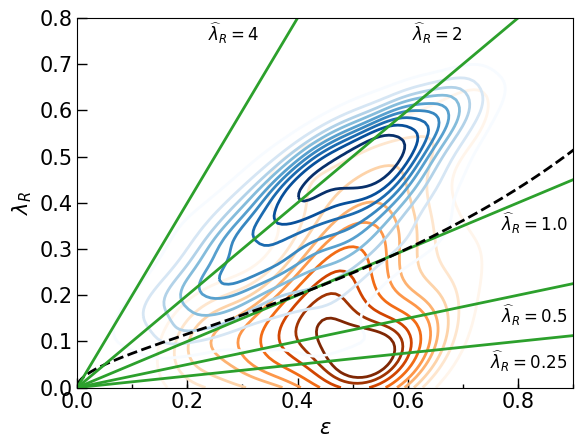

In [194]:
def lambda_cutoff(eps):
    e=np.sqrt(1-np.power(1-eps,2))
    o=0.5 * (np.arcsin(e)-e*np.sqrt(1-np.power(e,2))) / (e*np.sqrt(1-np.power(e,2)) - (1-np.power(e,2))*np.arcsin(e))
    d=0.7*eps
    v_s=np.sqrt((o*(1-d)-1)/(1+0.15*o*(1-d)))
    l=1.1*v_s/np.sqrt(1+(1.1**2)*np.power(v_s,2))
    l_cut=0.65*l
    return l_cut
from scipy import stats
def density_estimation(m1, m2,xMax=1,yMin=0,yMax=1):
    X, Y = np.mgrid[0:xMax:100j, yMin:yMax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z
def plotContour(whichPlot,galData,xData,xMin,xMax,yData,yMin,yMax,lowMass,highMass,colors=mpl.cm.jet):
    whichGal=np.argwhere((galData[:,2]>lowMass) & (galData[:,2]<highMass) & (galData[:,14]<0.5))
    print(whichGal.size)
    xData=xData[whichGal].T
    yData=yData[whichGal].T
    X, Y, Z = density_estimation(xData, yData,xMax=xMax,yMin=yMin,yMax=yMax)
    #finding levels by hand
    levels=np.zeros(9)
    total=Z.sum()
    for i in np.arange(1,10):
        frac=i/10
        #print(frac)
        thisLevel=Z.max()/2
        thisFrac=Z[Z>thisLevel].sum()/Z.sum()
        nStep=1
        while (np.abs(thisFrac - frac)>0.01):
            if(thisFrac>frac): #getting too much of the data
                thisLevel+=Z.max()/2.**(nStep+1)
            else:
                thisLevel-=Z.max()/2.**(nStep+1)
            thisFrac=Z[Z>thisLevel].sum()/Z.sum()
            if nStep==100:
                continue #so it doesn't run too long
            nStep+=1
        levels[9-i]=thisLevel
    #levels found
    whichPlot.contour(X,Y,Z,cmap=colors,levels=levels)
    whichPlot.set_facecolor('white') 


lambdaEps=plt.gca()
data=getGalaxyData(135)
eps=data[:,15]
lambdas=data[:,17]
x=np.linspace(0,1,1000)
plotContour(lambdaEps,data,eps,0,0.8,lambdas,0,0.8,10**1.5,1000,colors='Oranges')
plotContour(lambdaEps,data,eps,0,0.8,lambdas,0,0.8,0,10**1.5,colors='Blues')
lambdaEps.plot(x,0.5*x,c='C2'); lambdaEps.text(0.89,0.34, r'$\widehat{\lambda}_{R} = 1.0$',fontsize=12, fontweight='bold', ha='right');
lambdaEps.plot(x,lambda_cutoff(x),c='k',ls='--')
lambdaEps.plot(x,x,c='C2'); lambdaEps.text(0.7,0.75, r'$\widehat{\lambda}_{R} = 2$',fontsize=12, fontweight='bold', ha='right');
lambdaEps.plot(x,2*x,c='C2'); lambdaEps.text(0.33,0.75, r'$\widehat{\lambda}_{R} = 4$',fontsize=12, fontweight='bold', ha='right');
lambdaEps.plot(x,x/4.,c='C2'); lambdaEps.text(0.89,0.14, r'$\widehat{\lambda}_{R} = 0.5$',fontsize=12, fontweight='bold', ha='right');
lambdaEps.plot(x,x/8,c='C2'); lambdaEps.text(0.89,0.04, r'$\widehat{\lambda}_{R} = 0.25$',fontsize=12, fontweight='bold', ha='right');
#plotContour(lambdaEps,data,eps,0,0.8,lambdas,0,0.8,10,10**1.5,colors=mpl.cm.Greens)
lambdaEps.set_xlim(0,0.8)
lambdaEps.set_ylim(0,0.8)
minor_ticks_x = np.arange(0, 1, 0.1)
lambdaEps.set_xticks(minor_ticks_x, minor=True)
lambdaEps.xaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
lambdaEps.xaxis.set_tick_params(width=1, length=7, direction='in')
lambdaEps.yaxis.set_tick_params(width=1, length=7, direction='in');
lambdaEps.set_ylabel(r'$\lambda_R$')
lambdaEps.set_xlabel(r'$\epsilon$')
lambdaEps.set_facecolor('white')
plt.savefig('Plots/epsilon_lambda_mass_definition.pdf', format='pdf')
plt.show(lambdaEps)


2791
300
116
2791
300
116
2791
300
116
2791
300
116


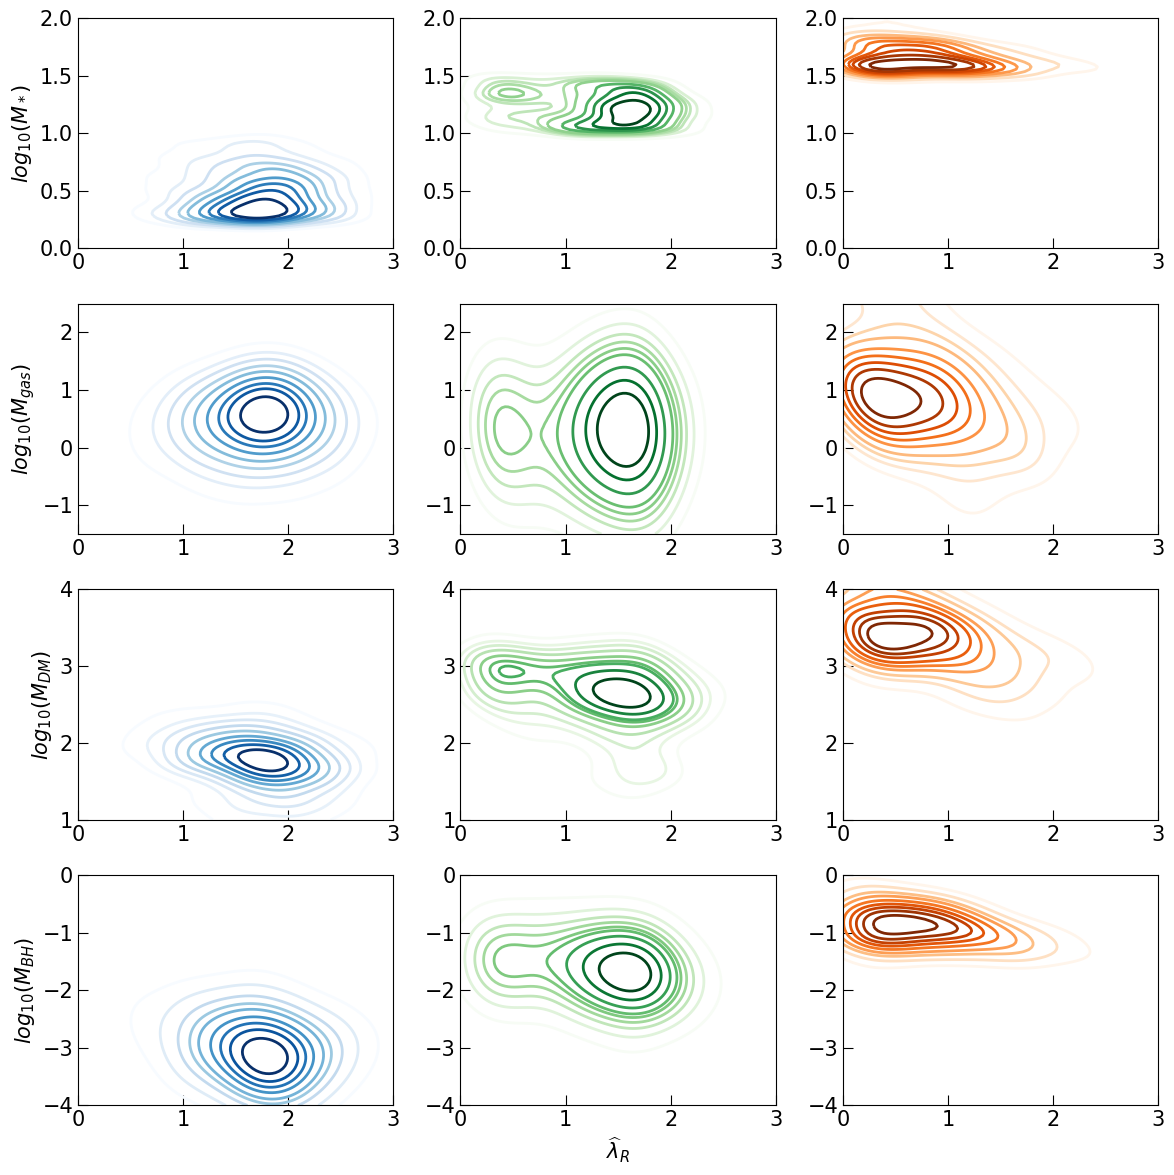

In [200]:
minor_ticks_x = np.arange(0, 4, 0.1);
fig=plt.figure(figsize=(12,12))
lambdaGrid=mpl.gridspec.GridSpec(4,3)
data=getGalaxyData(135)
lambdaHat=data[:,16]
lMin=0
lMax=3
# stellar mass
mass=np.log10(data[:,2])
minLog=0
maxLog=2
lowMass=plt.subplot(lambdaGrid[0,0])
midMass=plt.subplot(lambdaGrid[0,1])
highMass=plt.subplot(lambdaGrid[0,2])
plotContour(lowMass,data,lambdaHat,lMin,lMax,mass,minLog,maxLog,0,10,colors='Blues')
plotContour(midMass,data,lambdaHat,lMin,lMax,mass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highMass,data,lambdaHat,lMin,lMax,mass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowMass.set_ylabel(r'$log_{10}(M_*)$')

# gas mass
gasMass=np.log10(data[:,3]+1e-10)
minLog=-1.5
maxLog=2.5
lowGasMass=plt.subplot(lambdaGrid[1,0])
midGasMass=plt.subplot(lambdaGrid[1,1])
highGasMass=plt.subplot(lambdaGrid[1,2])
plotContour(lowGasMass,data,lambdaHat,lMin,lMax,gasMass,minLog,maxLog,0,10,colors='Blues')
plotContour(midGasMass,data,lambdaHat,lMin,lMax,gasMass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highGasMass,data,lambdaHat,lMin,lMax,gasMass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowGasMass.set_ylabel(r'$log_{10}(M_{gas})$')

# dm mass
dmMass=np.log10(data[:,4])
minLog=1
maxLog=4
lowDMmass=plt.subplot(lambdaGrid[2,0])
midDMmass=plt.subplot(lambdaGrid[2,1])
highDMmass=plt.subplot(lambdaGrid[2,2])
plotContour(lowDMmass,data,lambdaHat,lMin,lMax,dmMass,minLog,maxLog,0,10,colors='Blues')
plotContour(midDMmass,data,lambdaHat,lMin,lMax,dmMass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highDMmass,data,lambdaHat,lMin,lMax,dmMass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowDMmass.set_ylabel(r'$log_{10}(M_{DM})$')

# bh mass
bhMass=np.log10(data[:,18]+1e-10)
minLog=-4
maxLog=0
lowBHmass=plt.subplot(lambdaGrid[3,0])
midBHmass=plt.subplot(lambdaGrid[3,1])
highBHmass=plt.subplot(lambdaGrid[3,2])
plotContour(lowBHmass,data,lambdaHat,lMin,lMax,bhMass,minLog,maxLog,0,10,colors='Blues')
plotContour(midBHmass,data,lambdaHat,lMin,lMax,bhMass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highBHmass,data,lambdaHat,lMin,lMax,bhMass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowBHmass.set_ylabel(r'$log_{10}(M_{BH})$')
midBHmass.set_xlabel(r'$\widehat{\lambda}_R$')


plt.tight_layout()
plt.savefig('Plots/all_mass_contours.pdf', format='pdf')
plt.show(lambdaGrid)

In [77]:
def getHistory(sub):
    passFail=1
    fileName='Data/AccHistory/AccHistInt_SubGr.'+str(int(sub))+'.txt'
    fieldwidth = 16
    numfields = 5
    #data with gaps
    borkedHistory=np.genfromtxt(fileName,delimiter=(fieldwidth,)*numfields)
    a=borkedHistory[::4,:]
    b=borkedHistory[1::4,:]
    c=borkedHistory[2::4,:]
    d=borkedHistory[3::4,:1]
    if (d.shape[0]==0):
        #print('sub: ',sub,' is weird, skipping...')
        return np.zeros(1)
    history=np.hstack([a,b,c,d])
    return history
def getAccHistory(galData):
    snap=85
    nGal=galData.shape[0]
    accData=np.zeros((nGal,10))
    accData[:,0]=galData[:,1]
    accData[:,1]=galData[:,2]
    for i in np.arange(0,nGal):
        if i%1000==0:
            print('galaxy ',i)
        thisSub=galData[i,1]
        history=getHistory(thisSub)
        if history.size<10:
            accData[i,2]=-1
            continue #pathological error to do with weird number of entries per line in accHistory.txt file
        zEntry=np.argwhere((history[:,0]==0) & (history[:,1]==snap))
        if zEntry.size==0:
            accData[i,2]=-1
            continue
        accData[i,2]=history[zEntry,5] #stellar mass at snap
        majorMergers=np.argwhere((history[:,0]==2) & (history[:,1]>snap))
        accData[i,3]=np.sum(history[majorMergers,5])
        minorMergers=np.argwhere((history[:,0]==1) & (history[:,1]>snap))
        accData[i,4]=np.sum(history[minorMergers,5])
    return accData
galData=getGalaxyData(135)
accData=getAccHistory(galData)

galaxy  0
galaxy  1000
galaxy  2000
galaxy  3000
galaxy  4000


208  in bin
952  in bin
2658  in bin
1004  in bin
114  in bin
32  in bin
78  in bin
86  in bin
148  in bin
454  in bin
338  in bin
102  in bin
78  in bin
40  in bin


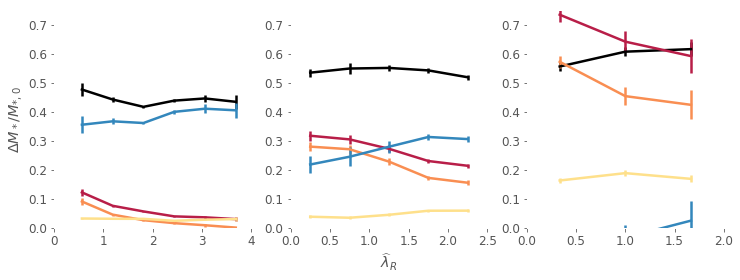

In [78]:
#Must run above cell first
def plotAccretion(whichPlot,galData,accData,lowMass,highMass,nBins,lMin,lMax):
    whichGal=np.argwhere((accData[:,2]!=-1) & (galData[:,2]>lowMass) & (galData[:,2]<highMass)
                         & (accData[:,3]+accData[:,4]<1*accData[:,1])) # makes sure a galaxy hasn't accreted WAY more than it's current mass!
    lambdaHat=galData[whichGal,16]
    dM=accData[whichGal,2]/accData[whichGal,1]
    dMajor=accData[whichGal,3]/accData[whichGal,1]
    dMinor=accData[whichGal,4]/accData[whichGal,1]
    dTotal=dMinor+dMajor
    dExtra=dM-dTotal
    edges=np.linspace(lMin,lMax,nBins+1)
    mids=0.5*(edges[1:]+edges[:-1])
    mean=np.zeros((nBins,5))
    err=np.zeros((nBins,5))
    for i in range(nBins):
        inBin=np.argwhere((lambdaHat>edges[i]) & (lambdaHat<edges[i+1]))
        print(inBin.size,' in bin')
        mean[i,0]=np.mean(dM[inBin])
        err[i,0]=np.std(dM[inBin])/np.sqrt(inBin.size)
        mean[i,1]=np.mean(dTotal[inBin])
        err[i,1]=np.std(dTotal[inBin])/np.sqrt(inBin.size)
        mean[i,2]=np.mean(dMajor[inBin])
        err[i,2]=np.std(dMajor[inBin])/np.sqrt(inBin.size)
        mean[i,3]=np.mean(dMinor[inBin])
        err[i,3]=np.std(dMinor[inBin])/np.sqrt(inBin.size)
        mean[i,4]=np.mean(dExtra[inBin])
        err[i,4]=np.std(dExtra[inBin])/np.sqrt(inBin.size)
    cmap=mpl.cm.get_cmap('Spectral')
    whichPlot.errorbar(mids,mean[:,0],yerr=err[:,0],c='k')
    whichPlot.errorbar(mids,mean[:,1],yerr=err[:,1],c=cmap(0.05))
    whichPlot.errorbar(mids,mean[:,2],yerr=err[:,2],c=cmap(0.25))
    whichPlot.errorbar(mids,mean[:,3],yerr=err[:,3],c=cmap(0.4))
    whichPlot.errorbar(mids,mean[:,4],yerr=err[:,4],c=cmap(0.9))
    whichPlot.set_ylim(0,0.75)
    whichPlot.set_xlim(0,edges[-1])
    whichPlot.set_facecolor('white')
fig=plt.figure(figsize=(12,4))
accGrid=mpl.gridspec.GridSpec(1,3)
accLow=plt.subplot(accGrid[0,0])
accMid=plt.subplot(accGrid[0,1])
accHigh=plt.subplot(accGrid[0,2])
plotAccretion(accLow,galData,accData,0,6,6,0.25,4)
plotAccretion(accMid,galData,accData,10,10**1.5,5,0,2.5)
plotAccretion(accHigh,galData,accData,10**1.5,1000,3,0,2)
accLow.set_ylabel(r'$\Delta M_* / M_{*,0}$')
accMid.set_xlabel(r'$\widehat{\lambda}_R$')
plt.show(accGrid)

In [248]:
noMajors=np.argwhere((accData[:,3]/accData[:,1] < 0.001) & (accData[:,4]/accData[:,1] < 0.3) & (accData[:,1]>10) & (galData[:,14]<0.5) & (galData[:,16]<1))
#noMajorsAll=np.argwhere((accData[:,3]/accData[:,1] < 0.001) & (galData[:,16]<1) & (galData[:,14]<0.5))
srsAll=np.argwhere((galData[:,16]<1) & (galData[:,14]<0.5) & (accData[:,1]>10))

In [249]:
import illustrisAPI.data as api

In [250]:
noMajors_nsub = np.zeros((noMajors.size, 2))
noMajors_nsub[:,0] = accData[noMajors,0][:,0]
noMajors_nsub[:,1] = noMajors[:,0]
np.savetxt('/Users/alex/Documents/Research/Astro/git_rep/Data/noMajors_nsub.txt', noMajors_nsub, delimiter =' ', fmt='%f',
           header = 'Index of massive ellpiticals with no major mergers and minor mergers over lifetime <0.1 of mass')

In [251]:
accData[noMajors,0][:,0].shape

(38,)

In [252]:
accData[noMajors,0].shape

(38, 1)